In [1]:
import os
import re
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from fpdf import FPDF
from pathlib import Path

%matplotlib inline

tqdm.pandas()

In [2]:
acl_anthology_path = r"C:\Data\anthology+abstracts"

In [3]:
acl_df = pd.read_pickle(acl_anthology_path + os.sep + 'anthology+abstracts_df.pkl')

In [4]:
def is_in_text(text, exp):
    ret = re.search(exp, text, re.I|re.M) is not None
    return ret

def find_papers(all_papers, exp):
    return all_papers[all_papers.apply(
        lambda row: is_in_text(str(row['title']), exp) and is_in_text(str(row['abstract']), exp),
        axis=1
    )]

def generate_abstracts_pdf(papers, path):
    pdf = FPDF()
    for i, row in papers.iterrows():
        pdf.add_page()
        pdf.set_font("Arial", size = 14)
        pdf.multi_cell(
            190, 20, align='C',
            txt=f"{row['title'].encode('utf-8').decode('latin-1','ignore')} ({row['year'].encode('utf-8').decode('latin-1','ignore')})"
        )
        pdf.set_font("Arial", size = 12)
        pdf.multi_cell(
            190, 10, align='L',border=True,
            txt=row['abstract'].encode('utf-8').decode('latin-1','ignore')
        )
    pdf.output(path + os.sep + 'papers.pdf')

def find_papers_and_save(all_papers, exp, path):
    Path(path).mkdir(parents=True, exist_ok=True)
    papers = find_papers(all_papers, exp)
    if len(papers) > 0:
        papers.to_excel(path + os.sep + 'papers.xlsx')
        papers.to_pickle(path + os.sep + 'papers.pkl')
        generate_abstracts_pdf(papers, path)
        plot_year_dist(papers)
        return papers
    else:
        return None

def plot_year_dist(papers):
    year_paper_dist = papers['year'].value_counts().reset_index()
    sns.barplot(data=year_paper_dist, x='index', y='year')

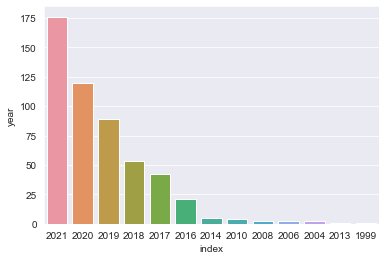

In [8]:
summarization_save_path = acl_anthology_path + os.sep + 'acl_summarization'
summ_papers = find_papers_and_save(acl_df, r'summarization', summarization_save_path)

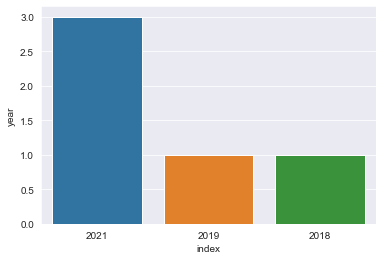

In [10]:
summarization_save_path = acl_anthology_path + os.sep + 'acl_guided_summarization'
guided_summ_papers = find_papers_and_save(acl_df, r'(guided|guiding|guide|personalized|directed).*summarization', summarization_save_path)